# Training and Testing DQN Agents in Gym Environments

### Imports

In [24]:
from agent_utils import Agent
from utils.plot_utils import plot_episodes
import gym
import sys

#### Set the random seed

In [25]:
seed = 634_5789
# Wilson Pickett - 634-5789 https://www.youtube.com/watch?v=TSGuaVAufV0

# Seed the environment for these libraries if they are imported
if 'torch' in sys.modules:
    sys.modules['torch'].manual_seed(seed)
    sys.modules['torch'].cuda.manual_seed_all(seed)
    sys.modules['torch'].backends.cudnn.deterministic = True
    sys.modules['torch'].backends.cudnn.benchmark = False

if 'numpy' in sys.modules:
    sys.modules['numpy'].random.seed(seed)

if 'random' in sys.modules:
    sys.modules['random'].seed(seed)

## The Cartpole

Environment details can be found [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

In [26]:
# Initialise Environment and set up Agent
env = gym.make('CartPole-v1', render_mode='rgb_array')
cartpole_agent = Agent(env)

### The DQN Parameters

In [27]:
# Set up the DQN parameters

input_size = cartpole_agent.env.observation_space.shape[0]
output_size = cartpole_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 32, 32, output_size]  # DQN Architecture
activation = "relu"
weights = "xunif"
optim = "Adam"
learning_rate = 1e-3
dqn_params = dict(
    layers=layers,
    activation=activation,
    weights=weights,
    optim=optim,
    learning_rate=learning_rate,
)

### Training Parameters

In [28]:
epsilon = 1 # Initial value of epsilon
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100_000 # Replay buffer size
batch_size = 64 # Batch size for training
epsilon_end = 0.01 # Minimum value of epsilon
episodes = 1000 # Number of episodes to train for
update_frequency = 5 # Update the target network every update_frequency steps
clip_rewards = False # Clip rewards to [-1, 1]
verbose = True # Print out the progress of the training every time the logger is updated

training_params = dict(
    epsilon=epsilon,
    eps_decay=eps_decay,
    replay_buffer=replay_buffer,
    batch_size=batch_size,
    epsilon_end=epsilon_end,
    episodes=episodes,
    update_frequency=update_frequency,
    dqn_params=dqn_params,
    clip_rewards=clip_rewards,
    verbose=verbose,
)

### Show a random rendering

<p align="center">
<img src="images/CartPole-v1/random.gif" alt="Random CartPole" width="750" />

### Train Agent

In [30]:
run_stats = cartpole_agent.train_agent(show_time=True, **training_params)

Training DQN Agent for CartPole-v1...
episode 100 of max 1000
episode 200 of max 1000
episode 300 of max 1000
episode 400 of max 1000
episode 500 of max 1000
episode 600 of max 1000
episode 700 of max 1000
episode 800 of max 1000
Environment solved within 862 episodes.
Average Score:  479.21
Training is complete
Total Training Time:  00 hour(s) 04 minute(s) 53 second(s)


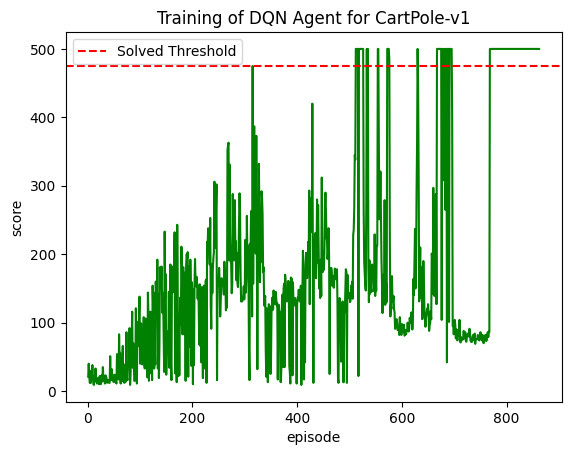

In [31]:
# Plot Training curve
plt_title = f"Training of {cartpole_agent.label} for {cartpole_agent.env.unwrapped.spec.id}"
plot_episodes(run_stats["episode_rewards"], title=plt_title, threshold=cartpole_agent.threshold)

### Evaluate Agent

In [32]:
# Show a trained rendering
cartpole_stats=cartpole_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 500.00
500 steps


<p align="center">
<img src="images/CartPole-v1/evaluation.gif" width="750"/>

## The Lunar Lander

Environment details can be found [here](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In [33]:
# Initialise Environment and set up Agent
env = gym.make("LunarLander-v2", render_mode='rgb_array')
lunar_agent = Agent(env)

### The DQN Parameters

In [34]:
# Set up the DQN parameters
input_size = lunar_agent.env.observation_space.shape[0]
output_size = lunar_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 256, 128, output_size]  # DQN Architecture
activation = "relu"
weights = "xunif"
optim = "Adam"
learning_rate = 1e-3
dqn_params = dict(layers=layers, activation=activation, weights=weights, optim=optim, learning_rate=learning_rate)

### Training Parameters

In [35]:
# Training Parameters
epsilon = 1 # Initial value of epsilon
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100_000 # Replay buffer size
batch_size = 64 # Batch size for training
epsilon_end = 0.01 # Minimum value of epsilon
episodes = 1000 # Number of episodes to train for
update_frequency = 5 # Update the target network every update_frequency steps
clip_rewards = False # Clip rewards to [-1, 1]
gamma = 1 # Discount factor
verbose = True # Print out the progress of the training every time the logger is updated

# Aggregate them into a dict for mapping
training_params = dict(epsilon=epsilon, eps_decay=eps_decay, replay_buffer=replay_buffer,
                       batch_size=batch_size, epsilon_end=epsilon_end, episodes=episodes,
                       update_frequency=update_frequency, dqn_params=dqn_params, clip_rewards=clip_rewards,
                       gamma=gamma, verbose=verbose)

<p align="center">
<img src="images/LunarLander-v2/random.gif" width="750" />

### Train Agent

In [41]:
# Train Agent
run_stats = lunar_agent.train_agent(show_time=True, **training_params)

Training DQN Agent for LunarLander-v2...
episode 100 of max 1000
episode 200 of max 1000
episode 300 of max 1000
episode 400 of max 1000
Environment solved within 467 episodes.
Average Score:  201.46
Training is complete
Total Training Time:  00 hour(s) 09 minute(s) 31 second(s)


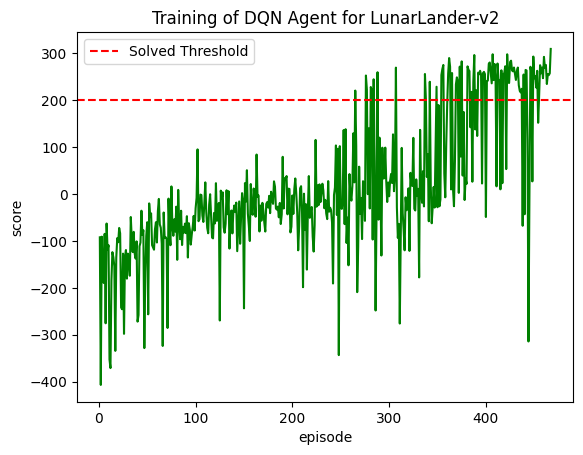

In [42]:
# Plot Training curve
plt_title = f"Training of {lunar_agent.label} for {lunar_agent.env.unwrapped.spec.id}"
plot_episodes(run_stats["episode_rewards"], title=plt_title, threshold=lunar_agent.threshold)

### Evaluate Agent

In [43]:
# Show a trained rendering
lunar_stats=lunar_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 203.44
649 steps


<p align="center">
<img src="images/LunarLander-v2/evaluation.gif" width="750" align="center" />